In [8]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

#This will be used to plot a 3d graph of the area of interest
px.set_mapbox_access_token(open("mapbox_token.txt").read())

In [9]:
df_data = pd.read_csv("sao-paulo-properties-april-2019.csv")

In [10]:
df_data

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13635,265000,420,51,2,1,0,1,0,0,0,0,Jabaquara/São Paulo,sale,apartment,-23.653004,-46.635463
13636,545000,630,74,3,2,1,2,0,0,1,0,Jabaquara/São Paulo,sale,apartment,-23.648930,-46.641982
13637,515000,1100,114,3,3,1,1,0,0,1,0,Jabaquara/São Paulo,sale,apartment,-23.649693,-46.649783
13638,345000,48,39,1,2,1,1,0,1,1,0,Jabaquara/São Paulo,sale,apartment,-23.652060,-46.637046


In [11]:
df_rent = df_data[df_data["Negotiation Type"] == "rent"]
df_rent

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11205,3700,595,73,1,2,1,1,0,0,1,0,Brooklin/São Paulo,rent,apartment,-23.617682,-46.694963
11206,21000,3000,208,4,4,3,3,1,1,1,0,Brooklin/São Paulo,rent,apartment,-23.606891,-46.695934
11207,3800,710,55,1,1,0,1,0,1,1,0,Brooklin/São Paulo,rent,apartment,0.000000,0.000000
11208,5000,2354,205,3,2,1,2,1,0,0,0,Brooklin/São Paulo,rent,apartment,-23.612287,-46.681482


In [12]:
df_rent.shape

(7228, 16)

In [13]:
df_rent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7228 entries, 0 to 11209
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             7228 non-null   int64  
 1   Condo             7228 non-null   int64  
 2   Size              7228 non-null   int64  
 3   Rooms             7228 non-null   int64  
 4   Toilets           7228 non-null   int64  
 5   Suites            7228 non-null   int64  
 6   Parking           7228 non-null   int64  
 7   Elevator          7228 non-null   int64  
 8   Furnished         7228 non-null   int64  
 9   Swimming Pool     7228 non-null   int64  
 10  New               7228 non-null   int64  
 11  District          7228 non-null   object 
 12  Negotiation Type  7228 non-null   object 
 13  Property Type     7228 non-null   object 
 14  Latitude          7228 non-null   float64
 15  Longitude         7228 non-null   float64
dtypes: float64(2), int64(11), object(3)
memory usa

In [14]:
df_rent.describe()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude
count,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000
mean,3077.669065,825.194798,89.486165,2.304234,2.105562,1.024488,1.452269,0.299806,0.172939,0.487963,0.000830,-22.032278,-43.500873
std,3522.830284,835.621937,63.976416,0.829108,0.998162,0.884241,0.889535,0.458205,0.378220,0.499890,0.028802,5.962534,11.675070
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-46.749039,-58.364352
25%,1350.000000,395.750000,52.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-23.598066,-46.689788
50%,2000.000000,595.000000,67.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-23.555869,-46.644793
75%,3300.000000,990.000000,100.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,-23.522756,-46.585110
max,50000.000000,9500.000000,880.000000,10.000000,8.000000,5.000000,9.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000


In [15]:
df_rent_cleaned = df_rent.drop(['New', 'Negotiation Type', 'Property Type'], axis =1)
df_rent_cleaned

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,District,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,Artur Alvim/São Paulo,-23.525025,-46.482436
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11205,3700,595,73,1,2,1,1,0,0,1,Brooklin/São Paulo,-23.617682,-46.694963
11206,21000,3000,208,4,4,3,3,1,1,1,Brooklin/São Paulo,-23.606891,-46.695934
11207,3800,710,55,1,1,0,1,0,1,1,Brooklin/São Paulo,0.000000,0.000000
11208,5000,2354,205,3,2,1,2,1,0,0,Brooklin/São Paulo,-23.612287,-46.681482


## Os modelos de machine learning não lida muito bem com dados categóricos. É preciso que sejam números. Mas, nesse caso, como temos mais de 90 variáveis, é preciso cautela pois o modelo pode entender esse número como uma magnitude e não como uma categoria. Nesses casos vamos fazer o one hot encoding

Para isso, vamos utilizar o Scikit-Learn para tratar a coluna df_rent_cleaned['District'] que contém os bairros.

from sklearn.preprocessing import OrdinalEncoder

ordinal encoder = OrdinalEncoder()

In [16]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
district_encoded = ordinal_encoder.fit_transform(df_rent_cleaned[['District']])

In [17]:
district_encoded

array([[3.],
       [3.],
       [3.],
       ...,
       [9.],
       [9.],
       [9.]])

#### O one hot encoding vai transformar todas as categorias de uma coluna em novas colunas. No caso desse estudo, cada bairro vira uma coluna. Se, aquele imóvel específico pertence àquele bairro, o valor 1 é atribuído na coluna do bairro. Caso contrário é 0

In [18]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(df_rent_cleaned[['District']])
housing_cat_1hot

#A classe do tipo sparse matrix é uma representação do computador para economizar memória, deletanto tudo o que
#são zeros em uma matriz muito grande contendo zeros e uns. 

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 7228 stored elements and shape (7228, 94)>

In [19]:
housing_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Existe ainda uma maneira do próprio pandas para resolver que se chama get_dummies

In [20]:
one_hot = pd.get_dummies(df_rent_cleaned['District'], dtype=int) #aqui se eu não declaro o dtype, retorna boolean
df = df_rent_cleaned.drop('District', axis=1)
df = df.join(one_hot)
df


,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,...,Vila Jacuí/São Paulo,Vila Leopoldina/São Paulo,Vila Madalena/São Paulo,Vila Maria/São Paulo,Vila Mariana/São Paulo,Vila Matilde/São Paulo,Vila Olimpia/São Paulo,Vila Prudente/São Paulo,Vila Sônia/São Paulo,Água Rasa/São Paulo
0,930,220,47,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1000,148,45,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1000,100,48,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1000,200,48,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1300,410,55,2,2,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11205,3700,595,73,1,2,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11206,21000,3000,208,4,4,3,3,1,1,1,...,0,0,0,0,0,0,0,0,0,0
11207,3800,710,55,1,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
11208,5000,2354,205,3,2,1,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
one_hot

,Alto de Pinheiros/São Paulo,Anhanguera/São Paulo,Aricanduva/São Paulo,Artur Alvim/São Paulo,Barra Funda/São Paulo,Bela Vista/São Paulo,Belém/São Paulo,Bom Retiro/São Paulo,Brasilândia/São Paulo,Brooklin/São Paulo,...,Vila Jacuí/São Paulo,Vila Leopoldina/São Paulo,Vila Madalena/São Paulo,Vila Maria/São Paulo,Vila Mariana/São Paulo,Vila Matilde/São Paulo,Vila Olimpia/São Paulo,Vila Prudente/São Paulo,Vila Sônia/São Paulo,Água Rasa/São Paulo
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11205,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11206,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11207,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11208,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# Treinando os primeiros modelos

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
Y = df['Price']
X = df.loc[:, df.columns != 'Price']

In [83]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

In [84]:
y_train

10109    1100
3890     9000
2359     2200
1846     1300
2945      800
         ... 
4779     1300
3453     1050
10548    1400
2670     1500
3152     1200
Name: Price, Length: 5059, dtype: int64

In [85]:
x_train

,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,Latitude,...,Vila Jacuí/São Paulo,Vila Leopoldina/São Paulo,Vila Madalena/São Paulo,Vila Maria/São Paulo,Vila Mariana/São Paulo,Vila Matilde/São Paulo,Vila Olimpia/São Paulo,Vila Prudente/São Paulo,Vila Sônia/São Paulo,Água Rasa/São Paulo
10109,515,58,2,2,1,1,0,0,1,-23.586382,...,0,0,0,0,0,0,0,0,0,0
3890,4583,510,5,5,4,3,0,0,1,-23.610492,...,0,0,0,0,0,0,0,0,0,0
2359,400,57,2,1,0,1,0,0,1,-23.550118,...,0,0,0,0,0,0,0,0,0,0
1846,450,72,2,2,1,1,0,0,0,-23.521130,...,0,0,0,0,0,0,0,0,0,0
2945,140,48,2,1,0,1,1,0,0,0.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4779,408,57,2,2,1,1,0,0,1,0.000000,...,0,0,0,0,0,0,0,0,0,0
3453,750,58,2,3,2,1,0,0,0,-23.664753,...,0,0,0,0,0,0,0,0,0,0
10548,1460,85,3,2,1,2,0,0,0,-23.659490,...,0,0,0,0,0,0,0,0,0,0
2670,420,65,3,2,1,1,0,0,0,-23.469400,...,0,0,0,0,0,0,0,0,0,0


## Aqui serão utilizados três modelos no mesmo conjunto de dados.
- Regressão Linear
- Árvore de decisão
- Floresta aleatória

### Regressão linear

In [86]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train) #Aqui será utilizada a função custo para otimização do modelo. 
#A função custo é o que ele quer otimizar que é a soma da diferença entre o predito e o valor real. 

LinearRegression()

In [92]:
#Comparando o resultado do modelo com o resultado real:
alguns_dados = x_train.iloc[:10]
algumas_labels = y_train.iloc[:10] #label é a variável resposta. 

#
print("Predições: ", lin_reg.predict(alguns_dados).round()) #aqui, estou utilizando o modelo que foi treinado para obter as respostas.
print("Valor real: ", algumas_labels.values)

Predições:  [ 1434. 13779.  1566.  1735.   702.   964.  5569.   740.  3964.  1593.]
Valor real:  [1100 9000 2200 1300  800  850 2800 1700 4200 2200]


In [94]:
#Como saber se o modelo foi bom ou ruim.
#Erro quadrado médio

from sklearn.metrics import mean_squared_error
preds = lin_reg.predict(x_train) 
lin_mse = mean_squared_error(y_train, preds)

#Agora tirando a raiz do erro
lin_rmse = np.sqrt(lin_mse)
print('lin_mse: ', lin_mse)
print('lin_rmse: ', lin_rmse)

lin_mse:  3562030.6312176767
lin_rmse:  1887.3342658940087


Aqui tivemos um problema de underfitting. O modelo não tem capacidade suficiente para lidar com o problema e entregar uma boa predição.

### Decision Tree

In [96]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [97]:
preds = tree_reg.predict(x_train)
tree_mse = mean_squared_error(y_train, preds)

tree_rmse = np.sqrt(tree_mse)
print('tree_mse: ', tree_mse)
print('tree_rmse: ', tree_rmse)

lin_mse:  469.24072609870194
lin_rmse:  21.66196496393395


Já aqui tivemos overfitting. O modelo decorou os dados de teste.

## Cross validation
Cross Validation é uma técnica muito utilizada para avaliação de desempenho de modelos de aprendizado de máquina. O CV consiste em particionar os dados em conjuntos(partes), onde um conjunto é utilizado para treino e outro conjunto é utilizado para teste e avaliação do desempenho do modelo. A utilização do CV tem altas chances de detectar se o seu modelo está sobreajustado aos seus dados de treinamento, ou seja, sofrendo overfitting. Existem mais de um método de aplicação de CV, como por exemplo o K-fold.

K-fold consiste em dividir a base de dados de forma aleatória em K subconjuntos (em que K é definido previamente) com aproximadamente a mesma quantidade de amostras em cada um deles. A cada iteração, treino e teste, um conjunto formado por K-1 subconjuntos são utilizados para treinamento e o subconjunto restante será utilizado para teste gerando um resultado de métrica para avaliação (ex: acurácia). Esse processo garante que cada subconjunto será utilizado para teste em algum momento da avaliação do modelo.

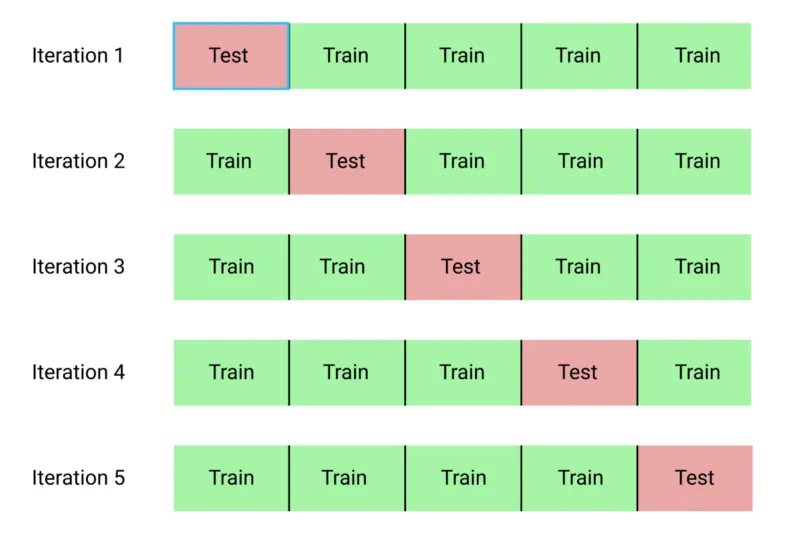

In [98]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())
display_scores(tree_rmse_scores)

Scores:  [1866.33933618 2491.60389119 2394.68872412 2139.40704458 2781.71845862
 2216.44329614 2183.92656914 2362.18866573 2323.56064716 3145.89064   ]
Mean:  2390.5767272849134
Standard deviation:  339.1090068936569


In [99]:
#Aplicando a mesma lógica para o modelo de regressão:
scores = cross_val_score(lin_reg, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())
display_scores(lin_rmse_scores)

Scores:  [1678.62521042 2116.88679837 2106.89400252 2092.30494741 2090.94134326
 1901.51938495 1830.15891262 2098.70775223 1683.00237398 1543.1248014 ]
Mean:  1914.2165527163172
Standard deviation:  207.1432423674939


## Random Forest Regression

In [101]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)

RandomForestRegressor()

In [102]:
preds = rf_reg.predict(x_train)
rf_mse = mean_squared_error(y_train, preds)

rf_rmse = np.sqrt(rf_mse)
print('rf_mse: ', rf_mse)
print('rf_rmse: ', rf_rmse)

rf_mse:  462553.10262833483
rf_rmse:  680.1125661449984


In [103]:
#Aplicando a mesma lógica do cross validation para random forest:
scores = cross_val_score(rf_reg, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
rf_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())
display_scores(rf_rmse_scores)

Scores:  [1524.68593404 2108.7895862  1891.9136783  2159.69876375 1768.25563181
 1511.33705151 1711.71229125 2083.22887061 1562.21552705 1456.49413984]
Mean:  1777.8331474364888
Standard deviation:  255.1375162113056


# Avaliar e otimizar o modelo
Com alterações de hiperparâmetros com greedsearch. Testar combinações de parâmetros diferentes

In [104]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3,10,30], 'max_features':[2,4,6,8]},
    {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error')

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [107]:
final_model = grid_search.best_estimator_
final_model_predictions = final_model.predict(x_test)

final_mse = mean_squared_error(y_test, final_model_predictions)
print(np.sqrt(final_mse))

1995.7724166082328


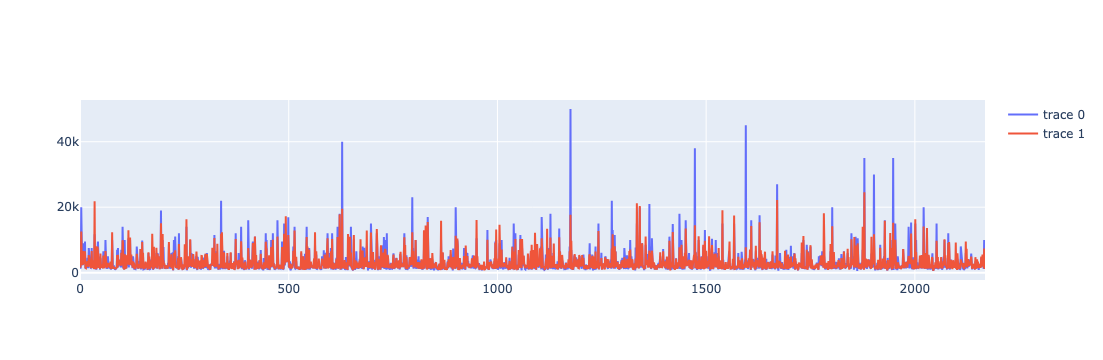

In [108]:
#Valores preditos vs valores reais nos dados que não foram utilizados para teste.
fig = go.Figure(data=[go.Scatter(y=y_test.values),
                      go.Scatter(y=final_model_predictions)])
fig.show()